In [57]:
#This .ipynb is for task4b and task4c
import matplotlib.pyplot as plt
from PIL import Image
import torchvision
import torch
from torch import nn
import numpy as np
image = Image.open("images/zebra.jpg")
print("Image shape:", image.size)

model = torchvision.models.resnet18(pretrained=True)
#print(model)
first_conv_layer = model.conv1
print("First conv layer weight shape:", first_conv_layer.weight.shape)
print("First conv layer:", first_conv_layer)

# Resize, and normalize the image with the mean and standard deviation
image_transform = torchvision.transforms.Compose([
    torchvision.transforms.Resize((224, 224)),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
image = image_transform(image)[None]
print("Image shape:", image.shape)

activation = first_conv_layer(image)
print("Activation shape:", activation.shape)



def torch_image_to_numpy(image: torch.Tensor):
    """
    Function to transform a pytorch tensor to numpy image
    Args:
        image: shape=[3, height, width]
    Returns:
        iamge: shape=[height, width, 3] in the range [0, 1]
    """
    # Normalize to [0 - 1.0]
    image = image.detach().cpu() # Transform image to CPU memory (if on GPU VRAM)
    image = image - image.min()
    image = image / image.max()
    image = image.numpy()
    if len(image.shape) == 2: # Grayscale image, can just return
        return image
    assert image.shape[0] == 3, "Expected color channel to be on first axis. Got: {}".format(image.shape)
    image = np.moveaxis(image, 0, 2)
    return image


indices = [14, 26, 32, 49, 52]


Image shape: (224, 224)
First conv layer weight shape: torch.Size([64, 3, 7, 7])
First conv layer: Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
Image shape: torch.Size([1, 3, 224, 224])
Activation shape: torch.Size([1, 64, 112, 112])


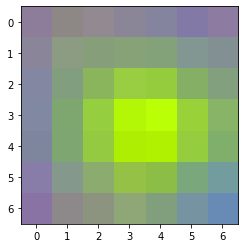

In [41]:
for i in indices:
    image1=torch_image_to_numpy(activation[0,i,:,:])
    plt.imshow(image1)
    plt.savefig('Activation_'+str(i)+'.png')
    filter_weight=torch_image_to_numpy(first_conv_layer.weight[i,:,:,:])
    plt.imshow(filter_weight)
    plt.savefig('Filter_weight_'+str(i)+'.png')

In [ ]:
#For Task4c by Xiaoyu Zhu

In [62]:
new_model = nn.Sequential(*list(model.children())[:-2]) 
print(new_model)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Con

In [65]:
activation_last=new_model(image)
print("Activation shape:", activation_last.shape)

Activation shape: torch.Size([1, 512, 7, 7])


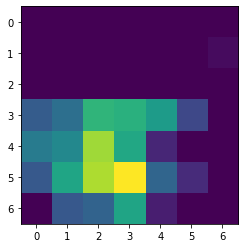

In [71]:
for i in range(10):
    image2=torch_image_to_numpy(activation_last[0,i,:,:])
    plt.imshow(image2)
    plt.savefig('Activation_Last_'+str(i)+'.png')